In [1]:
import pandas as pd
import json
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
#Load logfile with benchmark results
with open('server.log') as logfile:
    json_lines = logfile.readlines()

In [4]:
#Create dictionaries from logfile describing benchmark runs
run_dicts = [json.loads(line) for line in json_lines]

#Extract summary, drop details
run_summaries = [deepcopy(run_dict) for run_dict in run_dicts]
for d in run_summaries:
    d.pop("Round accuracies")
    d.pop("Round losses")

#Create summary dataframe
summary_df = pd.DataFrame(run_summaries)

#Take a look
summary_df


,Rounds,Epochs,Number of Clients,Final Accuracy,Final loss,Time
0,40,30,1,90.847458,0.274246,42.877765
1,40,30,2,89.152542,0.281953,61.223549
2,40,30,3,88.474576,0.285910,148.910804
3,40,30,4,88.135593,0.282098,729.194485
4,40,30,5,88.813559,0.284185,1944.554190
5,40,30,6,89.491525,0.285215,3704.912884
6,40,30,7,89.491525,0.284474,5941.728274
7,40,30,8,89.830508,0.282850,8996.466361
8,40,30,9,89.491525,0.283002,12051.256099


In [8]:
#Detailed, per round results
round_results = {d["Number of Clients"]:[d["Round accuracies"], d["Round losses"]] for d in run_dicts}

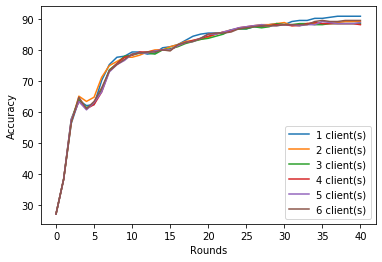

In [9]:
#Plotting accuracy graphs for all numbers of clients

acc_arrs = [np.array(list(round_results[i+1][0].values())) for i in range(6)]
rounds = np.array(range(41))

for i, acc_arr in enumerate(acc_arrs):
    plt.plot(rounds, acc_arr, label=f"{i+1} client(s)")
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Hmmmm